In [11]:
from confluent_kafka import Consumer, KafkaError
import json
import random
import time

# configure Kafka consumer
# bootstrap.servers specifies the kafka broker to connect to
# identifies the consumer group to which this consumer belongs
conf = {
    'bootstrap.servers': 'b-1.monstercluster1.6xql65.c3.kafka.eu-west-2.amazonaws.com:9092',  
    'group.id': 'your_group_id',
    'auto.offset.reset': 'earliest',
}


# set sample rate to 10%
sample_rate = 0.5  # 10%
sampled_data = []
timer_duration = 2


# create kafka consumer instance
consumer = Consumer(conf)

def consume_message(duration_minutes):
    start_time = time.time()  # Record the start time
    end_time = start_time + (duration_minutes * 60)  
    consumer.subscribe(['monster-damage']) #consume messages from the monster-damage Kafka topic

    while time.time() < end_time:
        msg = consumer.poll(1.0) #checks for message with a timeout of 1.0 seconds.
        if msg is None:
            # print("message is None") 
            continue  
        if msg.error(): #checks if message contains an error 
            if msg.error().code() == KafkaError._PARTITION_EOF: # if error is an end of file error it continues the loop
                continue
            else:
                print(msg.error()) # if error is not an end of file error it print the error and breaks the loop
                break

        if random.random() < sample_rate:
            decoded_msg = json.loads(msg.value().decode('utf-8'))  # Decode the JSON message
            print('Received message: {}'.format(decoded_msg))
            sampled_data.append(decoded_msg)

    consumer.close()

# Allows you to interupt the cell without throwing an excpetion
if __name__ == "__main__":
    try:
        consume_message(duration_minutes=timer_duration)
    except KeyboardInterrupt:
        pass

Received message: {'country': 'Greenland', 'population': 0, 'monster_name': 'MYCONID-ADULT', 'damage': 26640, 'updated_population': 0, 'percent_loss': 100, 'ts': '2023-12-14 09:58:46.858038'}
Received message: {'country': 'Indonesia', 'population': 272712914, 'monster_name': 'SHIELD-GUARDIAN', 'damage': 159840, 'updated_population': 272553074, 'percent_loss': 0.538, 'ts': '2023-12-14 09:58:57.524419'}
Received message: {'country': 'Namibia', 'population': 2149063, 'monster_name': 'GRICK', 'damage': 186480, 'updated_population': 1962583, 'percent_loss': 27.271, 'ts': '2023-12-14 09:59:02.606922'}
Received message: {'country': 'Russia', 'population': 136491654, 'monster_name': 'YUAN-TI-PIT-MASTER', 'damage': 26640, 'updated_population': 136465014, 'percent_loss': 6.946, 'ts': '2023-12-14 09:59:15.370191'}
Received message: {'country': 'Algeria', 'population': 42995559, 'monster_name': 'LIZARD-KING-QUEEN', 'damage': 226440, 'updated_population': 42769119, 'percent_loss': 2.827, 'ts': '202

In [12]:
sampled_data

[{'country': 'Greenland',
  'population': 0,
  'monster_name': 'MYCONID-ADULT',
  'damage': 26640,
  'updated_population': 0,
  'percent_loss': 100,
  'ts': '2023-12-14 09:58:46.858038'},
 {'country': 'Indonesia',
  'population': 272712914,
  'monster_name': 'SHIELD-GUARDIAN',
  'damage': 159840,
  'updated_population': 272553074,
  'percent_loss': 0.538,
  'ts': '2023-12-14 09:58:57.524419'},
 {'country': 'Namibia',
  'population': 2149063,
  'monster_name': 'GRICK',
  'damage': 186480,
  'updated_population': 1962583,
  'percent_loss': 27.271,
  'ts': '2023-12-14 09:59:02.606922'},
 {'country': 'Russia',
  'population': 136491654,
  'monster_name': 'YUAN-TI-PIT-MASTER',
  'damage': 26640,
  'updated_population': 136465014,
  'percent_loss': 6.946,
  'ts': '2023-12-14 09:59:15.370191'},
 {'country': 'Algeria',
  'population': 42995559,
  'monster_name': 'LIZARD-KING-QUEEN',
  'damage': 226440,
  'updated_population': 42769119,
  'percent_loss': 2.827,
  'ts': '2023-12-14 09:59:18.4499

In [13]:
len(sampled_data)

24

In [6]:
import pandas as pd

In [14]:
df = pd.DataFrame(sampled_data)

In [16]:
df

,country,population,monster_name,damage,updated_population,percent_loss,ts
0,Greenland,0,MYCONID-ADULT,26640,0,100.000,2023-12-14 09:58:46.858038
1,Indonesia,272712914,SHIELD-GUARDIAN,159840,272553074,0.538,2023-12-14 09:58:57.524419
2,Namibia,2149063,GRICK,186480,1962583,27.271,2023-12-14 09:59:02.606922
3,Russia,136491654,YUAN-TI-PIT-MASTER,26640,136465014,6.946,2023-12-14 09:59:15.370191
4,Algeria,42995559,LIZARD-KING-QUEEN,226440,42769119,2.827,2023-12-14 09:59:18.449943
5,Malaysia,32436963,AIR-ELEMENTAL,399600,32037363,1.232,2023-12-14 09:59:22.027200
6,Russia,136465014,YETH-HOUND,39960,136425054,6.976,2023-12-14 09:59:25.610301
7,Greenland,0,WARRIOR-LVL-4,26640,0,100.000,2023-12-14 09:59:31.180369
8,Pakistan,221572825,SHAMBLING-MOUND,159840,221412985,0.090,2023-12-14 09:59:42.426007
9,Venezuela,28208461,DEVILROOT,186480,28021981,1.417,2023-12-14 09:59:45.999359


## Exercise One

Objective: Basic Descriptions

1 A: Calculate and report the number of unique monsters appearing in your sample.

In [21]:
df['monster_name'].value_counts()

MYCONID-ADULT           1
SHIELD-GUARDIAN         1
OBLEX-SPAWN             1
DEATH-KISS              1
GIANT-FIRE-BEETLE       1
TORTLE                  1
WINGED-KOBOLD           1
OTYUGH                  1
VAMPIRE-SPAWN           1
GITHZERAI-ZERTH         1
LIZARDFOLK              1
GIBBERING-MOUTHER       1
ORC-BLADE-OF-ILNEVAL    1
BONECLAW                1
ANKHEG                  1
DEVILROOT               1
SHAMBLING-MOUND         1
WARRIOR-LVL-4           1
YETH-HOUND              1
AIR-ELEMENTAL           1
LIZARD-KING-QUEEN       1
YUAN-TI-PIT-MASTER      1
GRICK                   1
BASILISK                1
Name: monster_name, dtype: int64

In [23]:
num_unique_monsters = len(df['monster_name'].unique())
num_unique_monsters

24

There are 24 unique monsters in the sample


1 B: Find the average, minimum, and maximum damage caused by monsters in the sampled data.



In [26]:
df.damage.mean()

117382.5

In [27]:
df.damage.min()

6660

In [28]:
df.damage.max()

399600

## Exercise Two

Objective: Spot Anomalies


2 A: Identify if there are any monsters that cause significantly more damage than others in the sampled data.

Display all monsters whos damage is 1.5 times the average amount

In [29]:
df[df['damage']> (df.damage.mean()*1.5 )]

,country,population,monster_name,damage,updated_population,percent_loss,ts
2,Namibia,2149063,GRICK,186480,1962583,27.271,2023-12-14 09:59:02.606922
4,Algeria,42995559,LIZARD-KING-QUEEN,226440,42769119,2.827,2023-12-14 09:59:18.449943
5,Malaysia,32436963,AIR-ELEMENTAL,399600,32037363,1.232,2023-12-14 09:59:22.027200
9,Venezuela,28208461,DEVILROOT,186480,28021981,1.417,2023-12-14 09:59:45.999359
10,Russia,136105374,ANKHEG,219780,135885594,7.391,2023-12-14 09:59:57.270777
17,Algeria,42769119,OTYUGH,319680,42449439,3.589,2023-12-14 10:00:33.482414
23,Nigeria,206771227,BASILISK,213120,206558107,0.206,2023-12-14 10:01:47.277321


2 B: Check if there's any continent or country that's being disproportionately affected.

In [30]:
df[df['percent_loss']> (df.percent_loss.mean()*1.5 )]

,country,population,monster_name,damage,updated_population,percent_loss,ts
0,Greenland,0,MYCONID-ADULT,26640,0,100.000,2023-12-14 09:58:46.858038
2,Namibia,2149063,GRICK,186480,1962583,27.271,2023-12-14 09:59:02.606922
7,Greenland,0,WARRIOR-LVL-4,26640,0,100.000,2023-12-14 09:59:31.180369
12,Greenland,0,ORC-BLADE-OF-ILNEVAL,26640,0,100.000,2023-12-14 10:00:06.439599


## Exercise Three

In [31]:
import matplotlib.pyplot as plt

Objective: Visualisation

3 A: Plot a histogram of the damages caused by monsters to understand its distribution.

A histogram is divided into a set number of bins (intervals) and the histogram is constructed based on the frequenct of the data falling into each of those bins.

- A higher number of bins - gives more detail but can also introduce noise making it harder to spot trends
- A lower number of bins - more generalised view of the data (less detail) but may smooth out noise

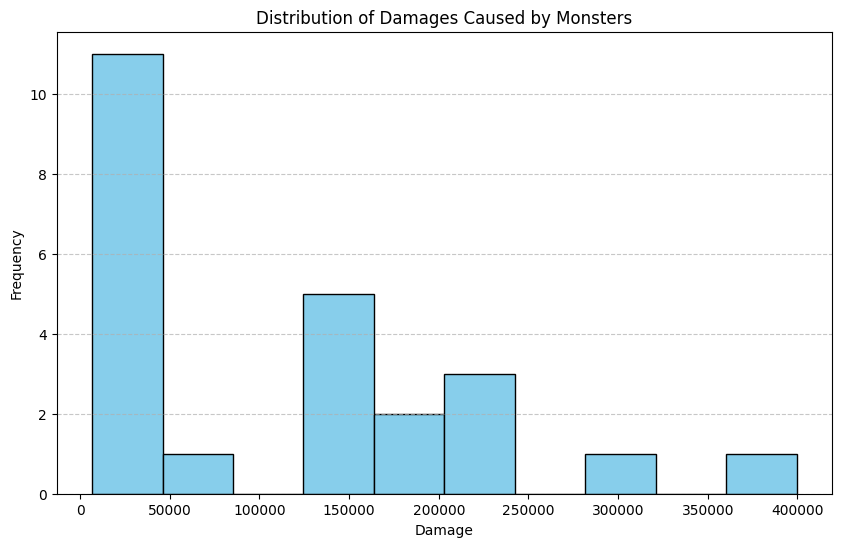

In [36]:
# Plot histogram of damages
plt.figure(figsize=(10, 6))
plt.hist(df['damage'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Damages Caused by Monsters')
plt.xlabel('Damage')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Same plot but with 5 bins, shows a clear trend than the majority of monsters have less than 100000 damage

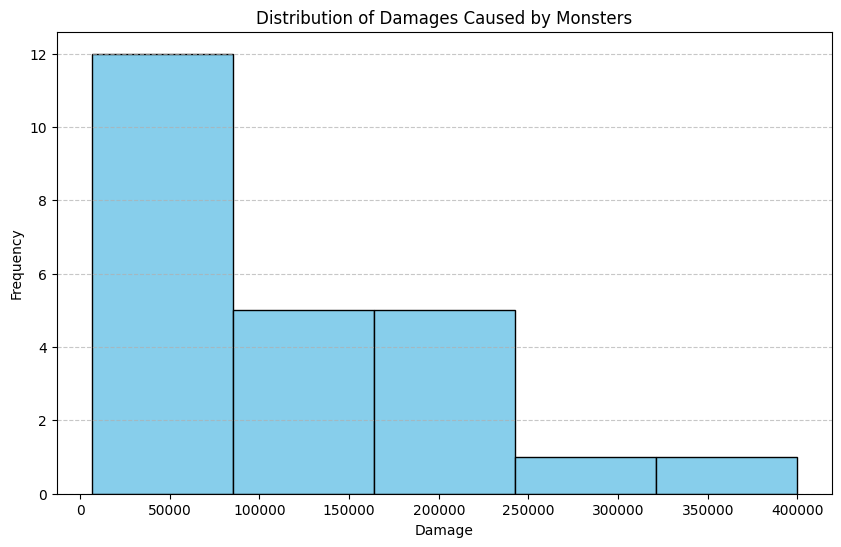

In [37]:
# Plot histogram of damages
plt.figure(figsize=(10, 6))
plt.hist(df['damage'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Damages Caused by Monsters')
plt.xlabel('Damage')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

3 B: Plot a time series chart to see if there's any pattern or specific times when damages spike.



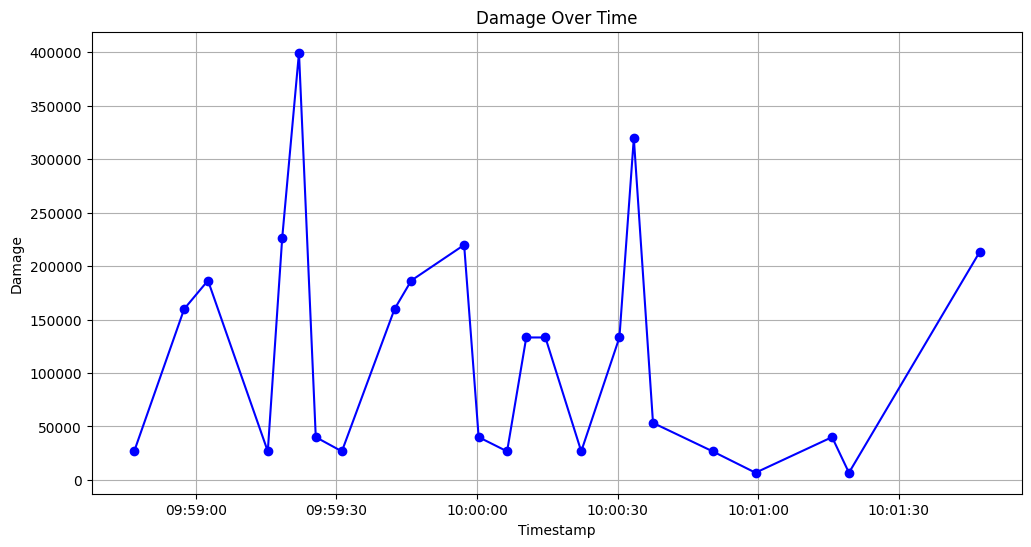

In [38]:
df['ts'] = pd.to_datetime(df['ts'])

# Plot time series chart
plt.figure(figsize=(12, 6))
plt.plot(df['ts'], df['damage'], marker='o', linestyle='-', color='b')
plt.title('Damage Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Damage')
plt.grid(True)
plt.show()